In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# For plotting
plt.style.use("ggplot")


In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


In [ ]:
# #Load Dataset
# import zipfile
# z = zipfile.ZipFile(r"C:\Users\sangi\Downloads\archive (22).zip")
# z.extractall()

# EDA



In [3]:
totaldata_glioma = os.listdir(r"C:\Users\alisa\OneDrive\Desktop\Brain-Tumor-MRI-Image-Classification\train\glioma")
number_files_glioma = len(totaldata_glioma)
print("Total glioma type image: " + str(number_files_glioma))

totaldata_meningioma = os.listdir(r"C:\Users\alisa\OneDrive\Desktop\Brain-Tumor-MRI-Image-Classification\train\meningioma")
number_files_meningioma = len(totaldata_meningioma)
print("Total meningioma type image :" + str(number_files_meningioma))

totalno_tumor = os.listdir(r"C:\Users\alisa\OneDrive\Desktop\Brain-Tumor-MRI-Image-Classification\train\no_tumor")
no_tumor = len(totalno_tumor)
print("No Tumor image " + str(no_tumor ))


totaldata_pituitary = os.listdir(r"C:\Users\alisa\OneDrive\Desktop\Brain-Tumor-MRI-Image-Classification\train\pituitary")
number_files_pituitary = len(totaldata_pituitary)
print("No pituitary image " + str(number_files_pituitary))




#sum of image
total_image=(number_files_glioma+number_files_meningioma+no_tumor+number_files_pituitary)
print("Total Image:"+str(total_image))

Total glioma type image: 564
Total meningioma type image :358
No Tumor image 335
No pituitary image 438
Total Image:1695


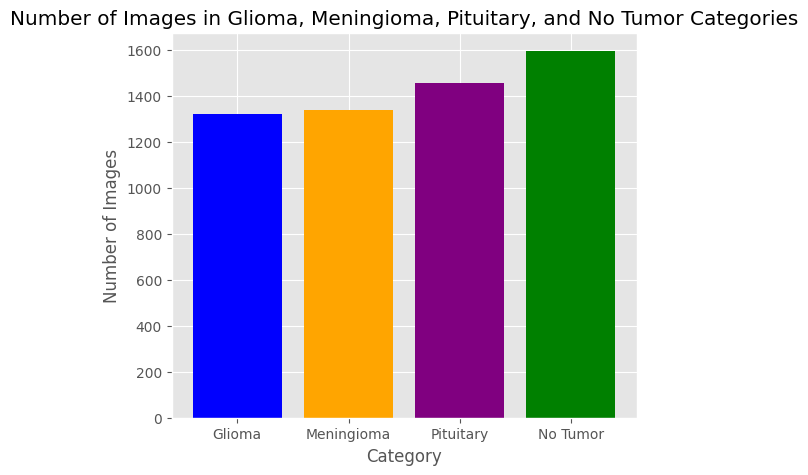

In [4]:
plt.figure(figsize=(6, 5))

totaldata_glioma = 1321 
totaldata_meningioma = 1339  
totalno_tumor = 1595
totaldata_pituitary = 1457

data = {
    "Glioma": totaldata_glioma, 
    "Meningioma": totaldata_meningioma,
    "Pituitary": totaldata_pituitary,
    "No Tumor": totalno_tumor
}

# Plot
plt.bar(data.keys(), data.values(), color=['blue', 'orange', 'purple', 'green'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Glioma, Meningioma, Pituitary, and No Tumor Categories')
plt.show()


In [5]:
import os
import cv2

x_train = []
y_train = []
image_size = 150
labels = ["glioma", "meningioma", "no_tumor", "pituitary"]

for i in labels:
    folderpath = os.path.join(r"C:\Users\alisa\OneDrive\Desktop\Brain-Tumor-MRI-Image-Classification\train", i)
    
    for j in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath, j))
        img = cv2.resize(img, (image_size, image_size))
        x_train.append(img)
        y_train.append(i)
        
        

for i in labels:
    folderpath = os.path.join(r"C:\Users\alisa\OneDrive\Desktop\Brain-Tumor-MRI-Image-Classification\test", i)
    
    for j in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath, j))
        img = cv2.resize(img, (image_size, image_size))
        x_train.append(img)
        y_train.append(i)

        
x_train=np.array(x_train)
y_train=np.array(y_train)


In [6]:
x_train,y_train=shuffle(x_train,y_train,random_state=100)
x_train.shape

(1941, 150, 150, 3)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=100)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))  
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)  

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))  
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)  


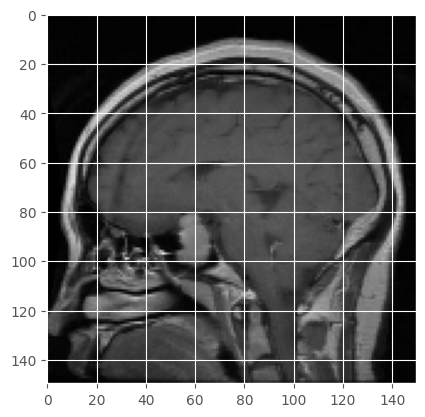

In [9]:
plt.imshow(x_train[1000])

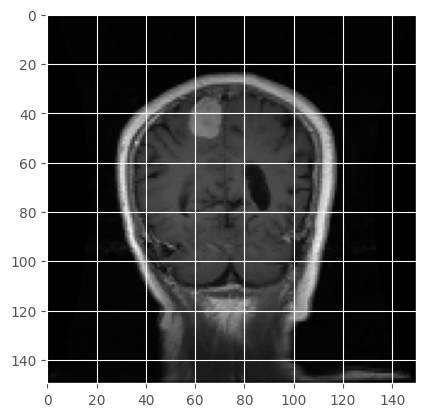

In [10]:
plt.imshow(x_train[190])

In [11]:
print(y_test[0])  


[0. 0. 0. 1.]


In [12]:
print(y_train[0])  

[0. 0. 1. 0.]


# CNN

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [15]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',                 
    metrics=['accuracy']              
)


In [16]:
history = model.fit(
    x_train,            
    y_train,           
    epochs=100,         
    validation_split=0.1,  
    batch_size=32       
)

Epoch 1/100
44/44 [==============================] - 32s 348ms/step - loss: 2.4710 - accuracy: 0.3059 - val_loss: 1.3649 - val_accuracy: 0.3590
Epoch 2/100
44/44 [==============================] - 8s 184ms/step - loss: 1.3297 - accuracy: 0.3474 - val_loss: 1.3284 - val_accuracy: 0.3590
Epoch 3/100
44/44 [==============================] - 8s 183ms/step - loss: 1.2010 - accuracy: 0.4592 - val_loss: 1.5510 - val_accuracy: 0.4615
Epoch 4/100
44/44 [==============================] - 8s 184ms/step - loss: 0.8872 - accuracy: 0.6511 - val_loss: 1.5743 - val_accuracy: 0.5769
Epoch 5/100
44/44 [==============================] - 8s 183ms/step - loss: 0.8255 - accuracy: 0.6655 - val_loss: 1.2898 - val_accuracy: 0.6026
Epoch 6/100
44/44 [==============================] - 8s 184ms/step - loss: 0.7071 - accuracy: 0.7120 - val_loss: 1.4462 - val_accuracy: 0.4808
Epoch 7/100
44/44 [==============================] - 8s 186ms/step - loss: 0.6527 - accuracy: 0.7256 - val_loss: 1.0339 - val_accuracy: 0.621

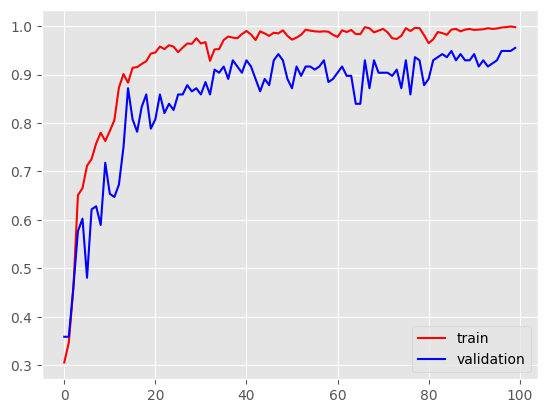

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

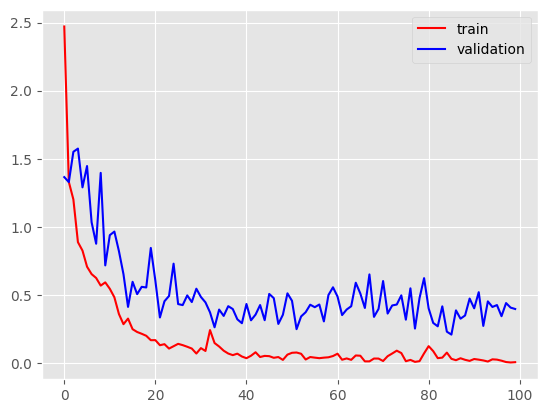

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

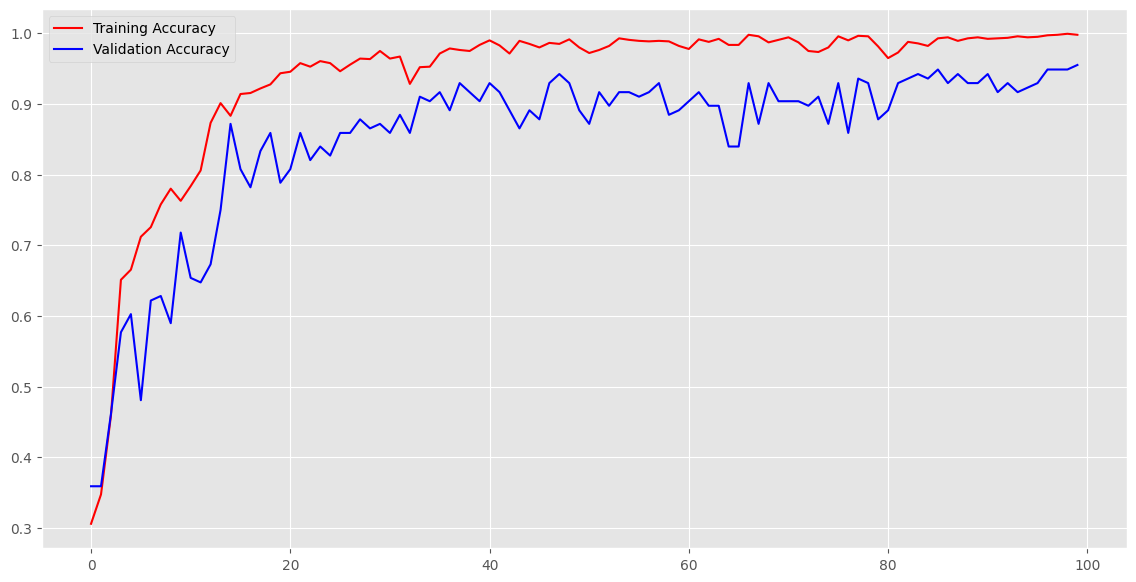

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

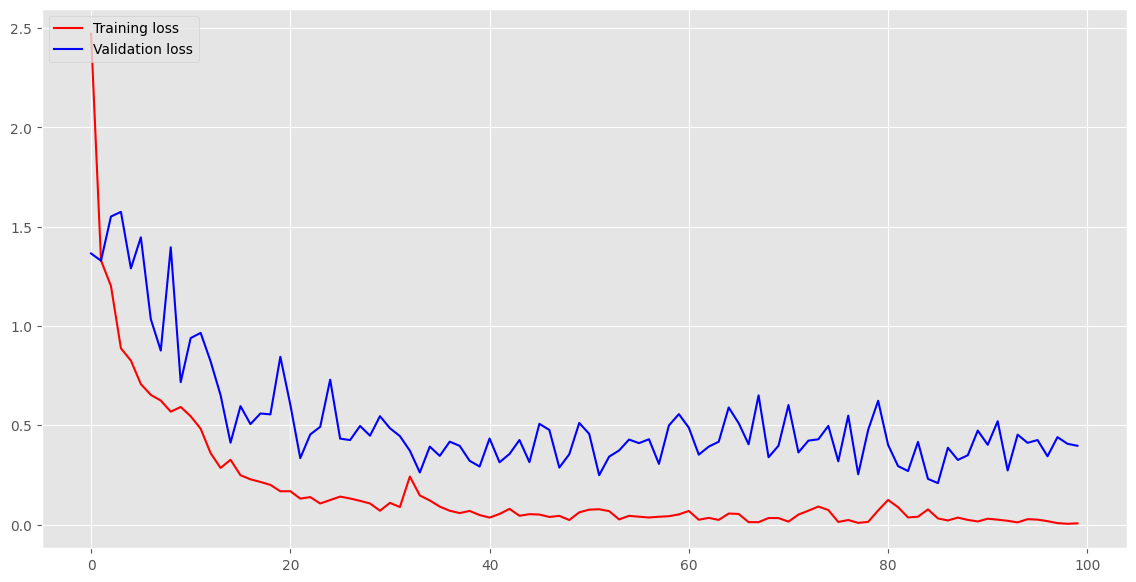

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

13/13 - 1s - loss: 0.4868 - accuracy: 0.9229 - 1s/epoch - 92ms/step
Test Loss: 0.4867897033691406
Test Accuracy: 0.922879159450531


In [22]:
prediction=model.predict(x_test)

13/13 [==============================] - 1s 33ms/step


In [23]:
Y_pred=prediction.argmax(axis=1)

In [24]:
Y_true = y_test.argmax(axis=1)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


cm = confusion_matrix(Y_true, Y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred, target_names=['Glioma', 'Meningioma',"Pituitary","No_Tumor"]))

Confusion Matrix:
[[131   4   0   0]
 [  1  70   6   7]
 [  1   9  72   2]
 [  0   0   0  86]]

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.98      0.97      0.98       135
  Meningioma       0.84      0.83      0.84        84
   Pituitary       0.92      0.86      0.89        84
    No_Tumor       0.91      1.00      0.95        86

    accuracy                           0.92       389
   macro avg       0.91      0.92      0.91       389
weighted avg       0.92      0.92      0.92       389



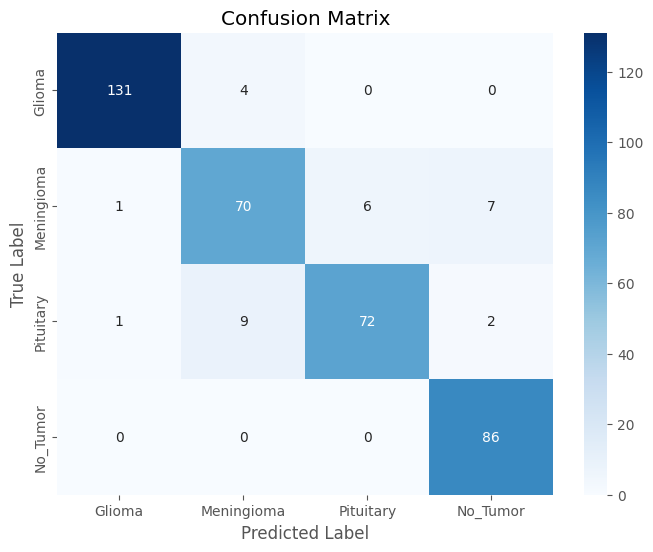

In [26]:
from sklearn.metrics import confusion_matrix

label_names = ['Glioma', 'Meningioma',"Pituitary","No_Tumor"]

# Generate confusion matrix
cm = confusion_matrix(Y_true, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
model.save('Brain_timor.h5')

In [28]:
from tensorflow.keras.models import load_model

model = load_model('Brain_timor.h5')